# PyPortrait: Simulating Bokeh with Python

In photography, [bokeh](https://en.wikipedia.org/wiki/Bokeh) is the aesthetic quality of the blur produced in the out-of-focus parts of an image produced by a lens. Bokeh has been defined as "the way the lens renders out-of-focus points of light".

IPhone 7 plus has an additional camera that produces this effect. But its  portrait camera's mode enhances via software with incredible results.

![](img/bokeh-emulation-wikipedia.PNG)
Comparison of bokeh (synthetic) and Gaussian blur - BenFrantzDale Wikipedia CC BY-SA 3.0

(300, 451, 3)

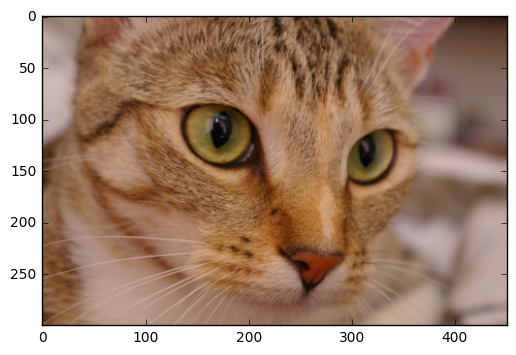

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure
from skimage import data

%matplotlib inline

cat = data.chelsea()
plt.imshow(cat)
cat.shape # cat is a 300-by-451 pixel image with three channels (red, green, and blue)

That's a nice kitty picture! Notice the out-of-the-focus background (bo-keh!!).The first thing we are going to do is to remove complexity converting the image to black and white. There are different [ways to do that](http://www.johndcook.com/blog/2009/08/24/algorithms-convert-color-grayscale/), but let's use the one by default in scikit-image that [preserves luminosity](http://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2gray)

(300, 451)

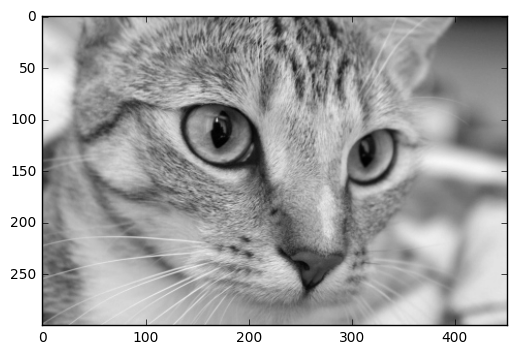

In [31]:
from skimage.color import rgb2gray
cat_gray = rgb2gray(cat)
plt.imshow(cat_gray, cmap=plt.cm.gray)
cat_gray.shape 

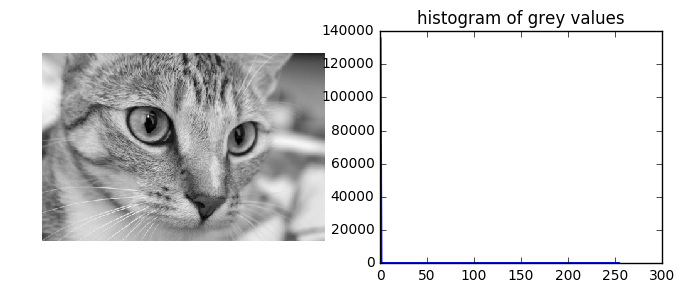

In [43]:
hist = np.histogram(cat_gray, bins=np.arange(0, 256))

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(cat_gray, cmap=plt.cm.gray, interpolation='nearest')
axes[0].axis('off')
axes[1].plot(hist[1][:-1], hist[0], lw=2)
axes[1].set_title('histogram of grey values')

Alright! Now we are ready to detect some the edges of this image:

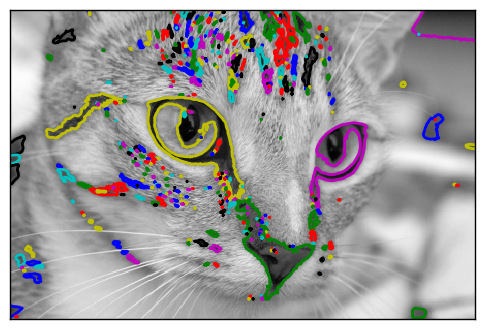

In [15]:
# http://scikit-image.org/docs/dev/auto_examples/edges/plot_contours.html#sphx-glr-auto-examples-edges-plot-contours-py

# Find contours at a constant value of 0.8
contours = measure.find_contours(cat_gray, 0.3)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(cat_gray, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

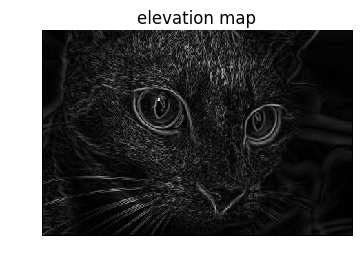

In [23]:
# http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_coins_segmentation.html?highlight=edge

from skimage.filters import sobel

elevation_map = sobel(cat_gray)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('elevation map')
ax.axis('off')
ax.set_adjustable('box-forced')

Next we find markers of the background and the coins based on the extreme parts of the histogram of grey values.

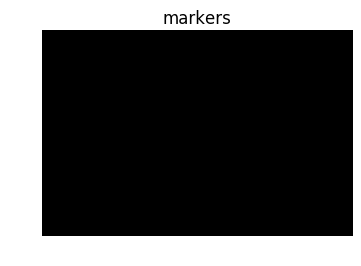

In [52]:
markers = np.zeros_like(cat_gray)
markers[cat_gray < 1000] = 1
markers[cat_gray > 7000] = 2

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.spectral, interpolation='nearest')
ax.set_title('markers')
ax.axis('off')
ax.set_adjustable('box-forced')

Finally, we use the watershed transform to fill regions of the elevation map starting from the markers determined above:

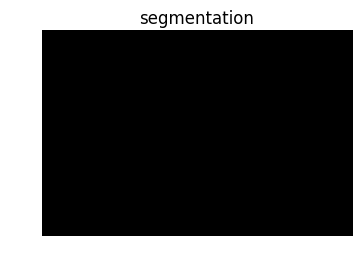

In [53]:
from skimage import morphology

segmentation = morphology.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('segmentation')
ax.axis('off')
ax.set_adjustable('box-forced')
